# **GRIP @ The Sparks Foundation** 

**Data Science and Business Analytics Intern**

**Task no.6: Prediction using DecisionTree Algorithm**

**Author: Bhavishya Chandnani**

***Importing the required libraries***

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split 
import sklearn.metrics as sm
import pydot
import pandas as pd 
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import pydot 
from IPython.display import Image 

***loading dataset*** 

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


***Data consists of 150 entries with 4 parameters as inputs : SepalWidth,SepalLength, PetalWidth, PetalLength and an output column which place them in a class.***

In [ ]:
df.drop(('Id'),axis=1,inplace=True) #dropping ID column 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


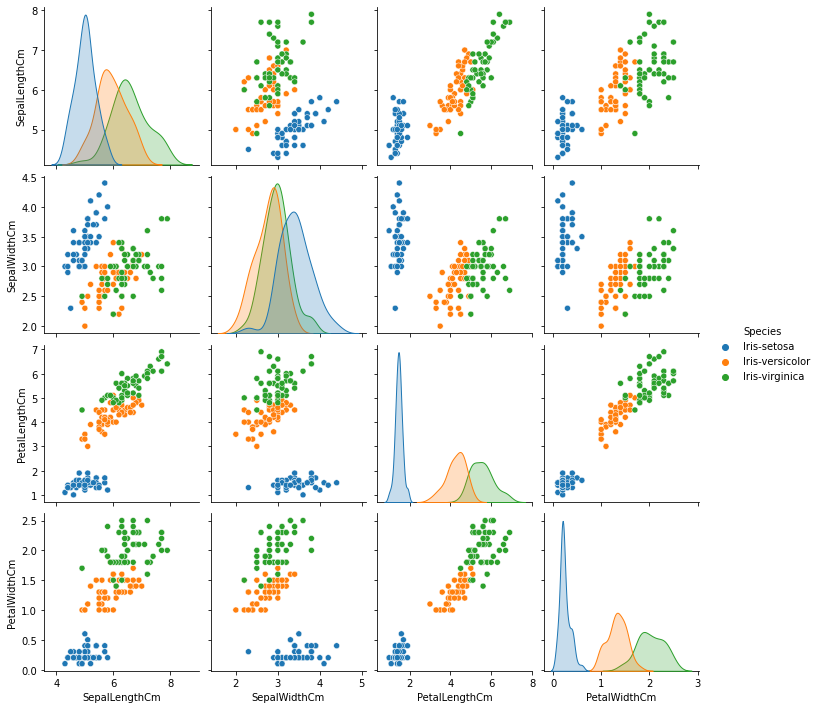

In [ ]:
#visualising the relationship between each parameter to Identify any correlation and separataion between classes.
sb.pairplot(data=df,hue='Species')

**The above graphs tell us that Sepal Width and Sepal Length give us no useful data to segregate the classes.**

**The graphs also make it clear that it is easy to differentiates Iris-setosa from the rest 2 species.**

**Iris-versicolor and Iris-virginica will cause confusion for the algorithm because of their close association.** 

***Data Pre-processing***

In [ ]:
#Converting the categorical values to numbers 
species_class = list(df.Species.unique())
df['Species'].replace(species_class,[x for x in range (len(species_class))],inplace=True )
#Splitting Dataset to Train and Test parts.
x_train,x_test,y_train,y_test= train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.25,random_state=0)

***Data Modelling*** 

In [ ]:
#Decision Tree classifier 
dt_classifier =DecisionTreeClassifier (criterion='entropy')
dt_classifier.fit(x_train ,y_train)
y_pred=dt_classifier.predict(x_test)

***Evaluating Prediction Accuracy*** 

In [ ]:
data=pd.DataFrame({'Actual output':y_test,'Predicted output': y_pred})
data

,Actual output,Predicted output
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


***Visualising the Decision Tree employed to classify entries by the concepts: Entropy and Information Gain.***

In [ ]:
export_graphviz(dt_classifier,out_file='decisionTree.dot',feature_names=df.columns [:-1],class_names=species_class,rounded=True,filled=True ) 

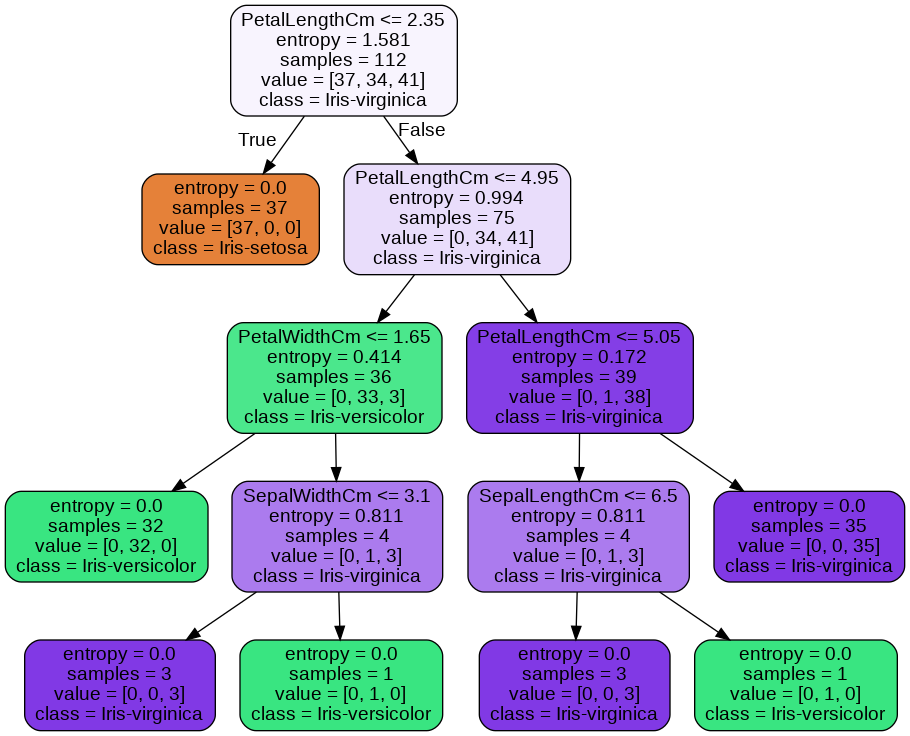

In [ ]:
(graph,)=pydot.graph_from_dot_file('decisionTree.dot')
graph.write_png('decisionTree.png')
Image(filename='decisionTree.png')

confusion matrix compares the predicted values to the actual values by returning a 20 matrix with False Positive and Negative values.
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Heatmap for the above Confusion Matrix:



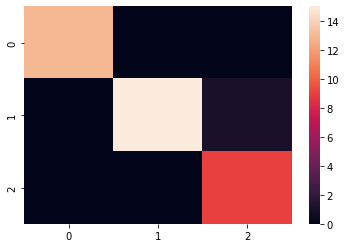

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix compares the predicted values to the actual values by returning a 20 matrix with False Positive and Negative values.")
print(cm)
print("Heatmap for the above Confusion Matrix:\n")
hm =sb.heatmap(cm)

***Any value outside the diagonal is a mistake in prediction . Since out dataset was good enough it didn't make many mistakes. Under conditions where there is a bad dataset , there could be several mistakes in prediction . These can be optimised by tuning parameters in the classifiers.***

***I am glad that i successfully completed this task under "The Sparks Foundation".***